In [1]:
import matplotlib.pyplot as plt
from pyqpanda import *

%matplotlib inline


def draw(prog):
    draw_qprog(prog, "pic", filename="a.png")
    plt.imshow(plt.imread("a.png"))
    plt.axis("off")
    plt.show()

In [10]:
from pyqpanda import *

init(QMachineType.CPU)
prog = QProg()
q = qAlloc_many(2)
c = cAlloc_many(2)
prog.insert(H(q[0]).dagger())
prog.insert(CNOT(q[0], q[1]))
prog.insert(measure_all(q, c))
# result = run_with_configuration(prog, cbit_list=c, shots=10000)
# print(result)
# finalize()
print(prog)


          ┌─┐         ┌─┐    
q_0:  |0>─┤H├ ───■── ─┤M├─── 
          └─┘ ┌──┴─┐  └╥┘┌─┐ 
q_1:  |0>──── ┤CNOT├ ──╫─┤M├ 
              └────┘   ║ └╥┘ 
 c :   / ══════════════╩══╩═
                        0  1




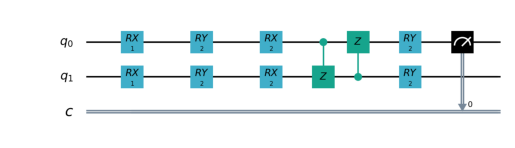

In [13]:
import numpy as np
from pyqpanda import *

init(QMachineType.CPU)
prog = QProg()
q = qAlloc_many(2)
c=cAlloc_many(1)
prog<<RX(q[0],1)<<RX(q[1],1)
prog<<RY(q[0],2)<<RY(q[1],2)
prog<<RX(q[0],2)<<RX(q[1],2)
prog<<CZ(q[0],q[1])<<CZ(q[1],q[0])
prog<<RY(q[0],2)<<RY(q[1],2)
prog<<measure_all([q[0]],c)

# prog << measure_all(q, c)
draw(prog)
# result = run_with_configuration(prog, cbit_list=c, shots=10000)
# print(result)

In [18]:
qvm = CPUQVM()
qvm.init_qvm()
qubits = qvm.qAlloc_many(3)
prog1 = QProg()
prog1 << H(qubits[0]) << CNOT(qubits[1], qubits[2])
mat = get_matrix(prog1, True)
prog = QProg()
prog << QOracle([qubits[0], qubits[1], qubits[2]], mat)

res1 = qvm.prob_run_dict(prog1, qubits)
res2 = qvm.prob_run_dict(prog, qubits)

# 打印测量结果
print(res1)
print(res2)

{'000': 0.5000000000000001, '001': 0.5000000000000001, '010': 0.0, '011': 0.0, '100': 0.0, '101': 0.0, '110': 0.0, '111': 0.0}
{'000': 0.4999999999999999, '001': 0.4999999999999999, '010': 0.0, '011': 0.0, '100': 0.0, '101': 0.0, '110': 0.0, '111': 0.0}


In [25]:
print(prog1)
t = 0
for i in range(3):
    for j in range(3):
        print(mat[t], end="\t")
        t += 1
    print()


          ┌─┐    
q_0:  |0>─┤H├─── 
          └─┘    
q_1:  |0>────■── 
          ┌──┴─┐ 
q_2:  |0>─┤CNOT├ 
          └────┘ 
 c :   / ═
          


(0.7071067811865475+0j)	(0.7071067811865475+0j)	0j	
0j	0j	0j	
0j	0j	(0.7071067811865475+0j)	



          ┌─┐                      
q_0:  |0>─┤H├ ───■── ────── ────── 
          └─┘ ┌──┴─┐               
q_1:  |0>──── ┤CNOT├ ───■── ────── 
              └────┘ ┌──┴─┐        
q_2:  |0>──── ────── ┤CNOT├ ───■── 
                     └────┘ ┌──┴─┐ 
q_3:  |0>──── ────── ────── ┤CNOT├ 
                            └────┘ 
 c :   / ═
          




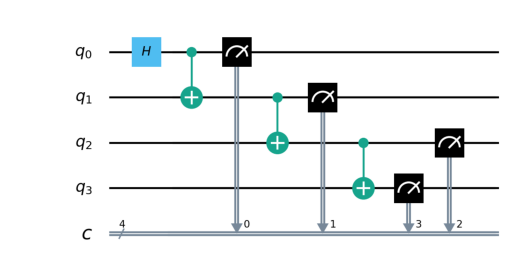

{'0000': 499, '1111': 501}


In [11]:
from pyqpanda import *

if __name__ == "__main__":

    qvm = CPUQVM()
    qvm.init_qvm()
    qubits = qvm.qAlloc_many(4)
    cbits = qvm.cAlloc_many(4)

    # 构建量子程序
    prog = QProg()
    circuit = QCircuit()

    (
        circuit
        << H(qubits[0])
        << CNOT(qubits[0], qubits[1])
        << CNOT(qubits[1], qubits[2])
        << CNOT(qubits[2], qubits[3])
    )
    print(circuit)

    prog << circuit << measure_all(qubits, cbits)
    draw_qprog(prog, "pic", filename="a.png")
    plt.imshow(plt.imread("a.png"))
    plt.axis("off")
    plt.show()

    # 量子程序运行1000次，并返回测量结果
    result = qvm.run_with_configuration(prog, cbits, 1000)

    # 打印量子态在量子程序多次运行结果中出现的次数
    print(result)

In [28]:
from pyqpanda import *

if __name__ == "__main__":

    qvm = CPUQVM()
    qvm.init_qvm()
    qubits = qvm.qAlloc_many(4)
    cbits = qvm.cAlloc_many(4)
    prog = QProg()

    # 构建量子程序
    (
        prog
        << H(qubits[0])
        << X(qubits[1])
        << iSWAP(qubits[0], qubits[1])
        << CNOT(qubits[1], qubits[2])
        << H(qubits[3])
        << measure_all(qubits, cbits)
    )

    print(prog)

    # 量子程序运行1000次，并返回测量结果
    # result = qvm.run_with_configuration(prog, cbits, 1000)
    result = qvm.directly_run(prog)

    # 打印量子态在量子程序多次运行结果中出现的次数
    print(result)


          ┌─┐       ┌─┐              
q_0:  |0>─┤H├ X─── ─┤M├───── ─────── 
          ├─┤ │     └╥┘       ┌─┐    
q_1:  |0>─┤X├ X─── ──╫───■── ─┤M├─── 
          └─┘        ║┌──┴─┐  └╥┘┌─┐ 
q_2:  |0>──── ──── ──╫┤CNOT├ ──╫─┤M├ 
          ┌─┐  ┌─┐   ║└────┘   ║ └╥┘ 
q_3:  |0>─┤H├ ─┤M├ ──╫────── ──╫──╫─ 
          └─┘  └╥┘   ║         ║  ║  
 c :   / ═══════╩════╩═════════╩══╩═
                 3    0         1  2


{'c0': True, 'c1': True, 'c2': True, 'c3': True}


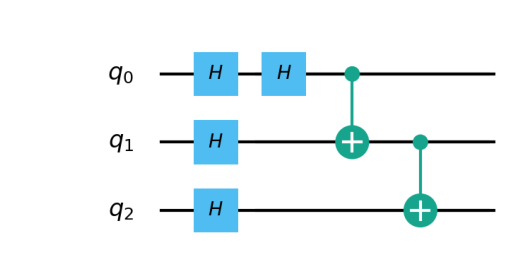

[(0, 0.5000000000000001), (7, 0.5000000000000001), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0)]


In [10]:
import matplotlib.pyplot as plt
from pyqpanda import *

%matplotlib inline

if __name__ == "__main__":

    qvm = CPUQVM()
    qvm.init_qvm()
    qubits = qvm.qAlloc_many(3)
    cbits = qvm.cAlloc_many(3)
    cbits[0].set_val(0)
    cbits[1].set_val(3)

    prog = QProg()
    branch_true = QProg()
    branch_false = QProg()

    # 构建QIf正确分支以及错误分支
    branch_true << H(qubits[0]) << H(qubits[1]) << H(qubits[2])
    (
        branch_false
        << H(qubits[0])
        << CNOT(qubits[0], qubits[1])
        << CNOT(qubits[1], qubits[2])
    )

    # 构建QIf
    qif = QIfProg(cbits[0] > cbits[1], branch_true, branch_false)

    # QIf插入到量子程序中
    prog << qif

    draw_qprog(prog, "pic", filename="a.png")
    plt.imshow(plt.imread("a.png"))
    plt.axis("off")
    plt.show()

    # 概率测量，并返回目标量子比特的概率测量结果，下标为十进制
    result = qvm.prob_run_tuple_list(prog, qubits, -1)

    # 打印概率测量结果
    print(result)

In [ ]:
from pyqpanda import *

if __name__ == "__main__":

    qvm = CPUQVM()
    qvm.init_qvm()
    qubits = qvm.qAlloc_many(3)
    cbits = qvm.cAlloc_many(3)
    cbits[0].set_val(0)
    cbits[1].set_val(1)

    prog = QProg()
    prog_while = QProg()

    # 构建QWhile的循环分支
    (
        prog_while
        << X(qubits[0])
        << H(qubits[1])
        << X(qubits[2])
        << assign(cbits[0], cbits[0] + 1)
        << Measure(qubits[1], cbits[1])
    )

    # 构建QWhile
    qwhile = QWhileProg(cbits[1], prog_while)

    # QWhile插入到量子程序中
    prog << qwhile << measure_all(qubits, cbits)
    print(prog)

    # 运行，并打印测量结果
    # result = qvm.directly_run(prog)
    result = qvm.run_with_configuration(prog, cbits, 1000)
    print(result)
    print(cbits[0].get_val())


          ┌─┐  ┌─┐            
q_0:  |0>─┤X├ ─┤M├────── ──── 
          ├─┤  └╥┘┌─┐     ┌─┐ 
q_1:  |0>─┤H├ ──╫─┤M├─── ─┤M├ 
          ├─┤   ║ └╥┘┌─┐  └╥┘ 
q_2:  |0>─┤X├ ──╫──╫─┤M├ ──╫─ 
          └─┘   ║  ║ └╥┘   ║  
 c :   / ═══════╩══╩══╩════╩═
                 0  1  2    1


